## 1. Import potrzebnych bibliotek

In [80]:
# import bibliotek
import re
import nltk
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Wczytanie, eksploracja i czyszczenie zbioru danych 

In [81]:
# wczytanie datasetu
dataset = pd.read_csv('sentiment140.csv',
                      encoding = 'ISO-8859-1',
                      names = ['target','id','date','flag','user','text'],
                      header = None)

In [82]:
# unikalne wartości kolumny 'target'
dataset['target'].unique()

array([0, 4], dtype=int64)

In [83]:
# negatywne tweety
dataset[dataset['target'] == 0].head(10)

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [84]:
# poztywne tweety
dataset[dataset['target'] == 4].head(10)

,target,id,date,flag,user,text
800000,4,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!
800001,4,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...
800002,4,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,4,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...
800004,4,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone
800005,4,1467822391,Mon Apr 06 22:22:47 PDT 2009,NO_QUERY,ajarofalmonds,@ProductOfFear You can tell him that I just bu...
800006,4,1467822447,Mon Apr 06 22:22:51 PDT 2009,NO_QUERY,vmdavinci,@r_keith_hill Thans for your response. Ihad al...
800007,4,1467822465,Mon Apr 06 22:22:48 PDT 2009,NO_QUERY,jessicavaliyi,"@KeepinUpWKris I am so jealous, hope you had a..."
800008,4,1467822489,Mon Apr 06 22:22:49 PDT 2009,NO_QUERY,emmasaur28,"@tommcfly ah, congrats mr fletcher for finally..."
800009,4,1467822496,Mon Apr 06 22:22:49 PDT 2009,NO_QUERY,SherylBreuker,@e4VoIP I RESPONDED Stupid cat is helping me ...


In [85]:
dataset['target'] = dataset['target'].replace(4,1)

### 2.1 Odrzucenie zbędnych kolumn

In [86]:
# odrzucenie niepotrzebnych kolumn
dataset.drop(['date','flag','user'], axis = 1)

,target,id,text
0,0,1467810369,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,is upset that he can't update his Facebook by ...
2,0,1467810917,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,my whole body feels itchy and like its on fire
4,0,1467811193,"@nationwideclass no, it's not behaving at all...."
...,...,...,...
1599995,1,2193601966,Just woke up. Having no school is the best fee...
1599996,1,2193601969,TheWDB.com - Very cool to hear old Walt interv...
1599997,1,2193601991,Are you ready for your MoJo Makeover? Ask me f...
1599998,1,2193602064,Happy 38th Birthday to my boo of alll time!!! ...


In [87]:
# zmiana kolejności kolumn
dataset = dataset[['id','target','text']]
dataset.head(10)

,id,target,text
0,1467810369,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1467810672,0,is upset that he can't update his Facebook by ...
2,1467810917,0,@Kenichan I dived many times for the ball. Man...
3,1467811184,0,my whole body feels itchy and like its on fire
4,1467811193,0,"@nationwideclass no, it's not behaving at all...."
5,1467811372,0,@Kwesidei not the whole crew
6,1467811592,0,Need a hug
7,1467811594,0,@LOLTrish hey long time no see! Yes.. Rains a...
8,1467811795,0,@Tatiana_K nope they didn't have it
9,1467812025,0,@twittera que me muera ?


### 2.2 Czyszczenie zbioru

In [88]:
# funkcja do czyszczenia tweetów według schematu (pattern'u)
def clean_data_by_pattern(text, pattern):
    r = re.findall(pattern, text)
    for i in r:
        text = re.sub(i, '',text)
    return text

#### 2.2.1 Usunięcie nazw użytkowników z tweetów

In [90]:
# usunięcie nazw użytkowniów ''@(...)'z tweetów (nie wnoszą one dużo dla analizy)
dataset['clean_text'] = np.vectorize(clean_data_by_pattern)(dataset['text'],"@[\w]*")
dataset.head(10)

,id,target,text,clean_text
0,1467810369,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","http://twitpic.com/2y1zl - Awww, that's a bum..."
1,1467810672,0,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...
2,1467810917,0,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball. Managed to s...
3,1467811184,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,1467811193,0,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am..."
5,1467811372,0,@Kwesidei not the whole crew,not the whole crew
6,1467811592,0,Need a hug,Need a hug
7,1467811594,0,@LOLTrish hey long time no see! Yes.. Rains a...,"hey long time no see! Yes.. Rains a bit ,onl..."
8,1467811795,0,@Tatiana_K nope they didn't have it,nope they didn't have it
9,1467812025,0,@twittera que me muera ?,que me muera ?


#### 2.2.2 Usunięcie znaków interpunkcyjnych, liczb i znaków specjalnych

In [91]:
# usunięcie znaków interpunkcyjnów, liczb i znaków specjalnych
# pozostawinie jedynie małych i wielkich liter alfabetu oraz #
dataset['clean_text'] = dataset['clean_text'].str.replace("[^a-zA-Z#]"," ")
dataset.head(10)

,id,target,text,clean_text
0,1467810369,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",http twitpic com y zl Awww that s a bum...
1,1467810672,0,is upset that he can't update his Facebook by ...,is upset that he can t update his Facebook by ...
2,1467810917,0,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball Managed to s...
3,1467811184,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,1467811193,0,"@nationwideclass no, it's not behaving at all....",no it s not behaving at all i m mad why am...
5,1467811372,0,@Kwesidei not the whole crew,not the whole crew
6,1467811592,0,Need a hug,Need a hug
7,1467811594,0,@LOLTrish hey long time no see! Yes.. Rains a...,hey long time no see Yes Rains a bit onl...
8,1467811795,0,@Tatiana_K nope they didn't have it,nope they didn t have it
9,1467812025,0,@twittera que me muera ?,que me muera


#### 2.2.3 Usunięcie słów krótszych niż 3 znaki

In [92]:
# usunięcie słów krótszych niż 3 znaki
dataset['clean_text'] = dataset['clean_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
dataset.head(10)

,id,target,text,clean_text
0,1467810369,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",http twitpic com Awww that bummer You shoulda ...
1,1467810672,0,is upset that he can't update his Facebook by ...,upset that can update his Facebook texting and...
2,1467810917,0,@Kenichan I dived many times for the ball. Man...,dived many times for the ball Managed save The...
3,1467811184,0,my whole body feels itchy and like its on fire,whole body feels itchy and like its fire
4,1467811193,0,"@nationwideclass no, it's not behaving at all....",not behaving all mad why here because can see ...
5,1467811372,0,@Kwesidei not the whole crew,not the whole crew
6,1467811592,0,Need a hug,Need hug
7,1467811594,0,@LOLTrish hey long time no see! Yes.. Rains a...,hey long time see Yes Rains bit only bit LOL f...
8,1467811795,0,@Tatiana_K nope they didn't have it,nope they didn have
9,1467812025,0,@twittera que me muera ?,que muera


#### 2.2.4 Tokenizacja tweetów

In [93]:
# tokenizacja
tokenized_text = dataset['clean_text'].apply(lambda x: x.split())
tokenized_text.head(10)


0    [http, twitpic, com, Awww, that, bummer, You, ...
1    [upset, that, can, update, his, Facebook, text...
2    [dived, many, times, for, the, ball, Managed, ...
3    [whole, body, feels, itchy, and, like, its, fire]
4    [not, behaving, all, mad, why, here, because, ...
5                              [not, the, whole, crew]
6                                          [Need, hug]
7    [hey, long, time, see, Yes, Rains, bit, only, ...
8                             [nope, they, didn, have]
9                                         [que, muera]
Name: clean_text, dtype: object

#### 2.2.5 Stemming

In [94]:
# stemming
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_text = tokenized_text.apply(lambda x: [stemmer.stem(i) for i in x])


In [95]:
tokenized_text.head(10)

0    [http, twitpic, com, awww, that, bummer, you, ...
1    [upset, that, can, updat, hi, facebook, text, ...
2    [dive, mani, time, for, the, ball, manag, save...
3      [whole, bodi, feel, itchi, and, like, it, fire]
4    [not, behav, all, mad, whi, here, becaus, can,...
5                              [not, the, whole, crew]
6                                          [need, hug]
7    [hey, long, time, see, ye, rain, bit, onli, bi...
8                             [nope, they, didn, have]
9                                         [que, muera]
Name: clean_text, dtype: object

In [96]:
for i in range(len(tokenized_text)):
    tokenized_text[i] = ' '.join(tokenized_text[i])
dataset['clean_text'] = tokenized_text
dataset.head(10)

,id,target,text,clean_text
0,1467810369,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",http twitpic com awww that bummer you shoulda ...
1,1467810672,0,is upset that he can't update his Facebook by ...,upset that can updat hi facebook text and migh...
2,1467810917,0,@Kenichan I dived many times for the ball. Man...,dive mani time for the ball manag save the res...
3,1467811184,0,my whole body feels itchy and like its on fire,whole bodi feel itchi and like it fire
4,1467811193,0,"@nationwideclass no, it's not behaving at all....",not behav all mad whi here becaus can see you ...
5,1467811372,0,@Kwesidei not the whole crew,not the whole crew
6,1467811592,0,Need a hug,need hug
7,1467811594,0,@LOLTrish hey long time no see! Yes.. Rains a...,hey long time see ye rain bit onli bit lol fin...
8,1467811795,0,@Tatiana_K nope they didn't have it,nope they didn have
9,1467812025,0,@twittera que me muera ?,que muera


## 3. Podział na zbiór testowy i treningowy

In [97]:
# rozmiar datasetu
dataset.shape

(1600000, 4)

In [98]:
# ilość tweetów pozytywnych i negatywnych
dataset['target'].value_counts()

1    800000
0    800000
Name: target, dtype: int64

In [99]:
# podział na negatywne i pozytywne datasety, aby podzielić na zbiór testowy i 
# treningowy z równą poporcją pozytywnych do negatywnych tweetów w obydwu zbiorach
positive_dataset = dataset[dataset['target'] == 1]
negative_dataset = dataset[dataset['target'] == 0]

In [100]:
# podział na zbiór treningowy i testowy
positive_train_set = positive_dataset.sample(frac=0.8, random_state=25)
positive_test_set = positive_dataset.drop(positive_train_set.index)

negative_train_set = negative_dataset.sample(frac=0.8, random_state=25)
negative_test_set = negative_dataset.drop(negative_train_set.index)

print(f"Rozmiar zbioru treningowego pozytywnych tweetów: {positive_train_set.shape[0]}")
print(f"Rozmiar zbioru testowego pozytywnych tweetów: {positive_test_set.shape[0]}")

print(f"Rozmiar zbioru treningowego negatywnych tweetów: {negative_train_set.shape[0]}")
print(f"Rozmiar zbioru testowego negatywnych tweetów: {negative_test_set.shape[0]}")

Rozmiar zbioru treningowego pozytywnych tweetów: 640000
Rozmiar zbioru testowego pozytywnych tweetów: 160000
Rozmiar zbioru treningowego negatywnych tweetów: 640000
Rozmiar zbioru testowego negatywnych tweetów: 160000


In [101]:
# połączenie zbiorów negatywnych i pozytywnych tweetów w jeden zbiór (operacja zarówno dla testowego i treningowego zbioru)
train_set = positive_train_set.append(negative_train_set)
test_set = positive_test_set.append(negative_test_set)

In [102]:
# zbiór treningowy ma 1280000 wierszy (80% całego zbiory danych), z czego połowa to tweety poztywne i połowa tweety negatywne
train_set.shape

(1280000, 4)

In [103]:
# zbiór testowy ma 320000 wierszy (20 % całego zbiory danych), z czego połowa to tweety poztywne i połowa tweety negatywne,
# więc dane są zbalansowane
test_set.shape

(320000, 4)

## 4. Analiza wyczyszczonego zbioru danych

### 4.1 Długość tweetów w treningowych i testowych zbiorach

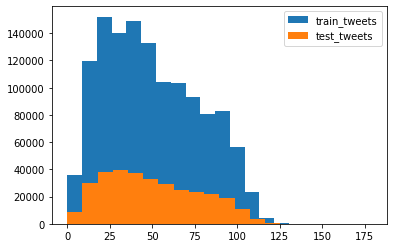

In [104]:
# sprawdzenie długości tweetów pod względem ilości słów zarówno zbiorze testowym i treningowym
# widać, że w obydwu datasetach rozkład tweetów pod względem długości jest w miarę podobny
length_train = train_set['clean_text'].str.len()
length_test = test_set['clean_text'].str.len()
plt.hist(length_train,bins = 20, label='train_tweets')
plt.hist(length_test,bins = 20, label='test_tweets')
plt.legend()
plt.show()

### 4.2 Wordclouds

#### 4.2.1 Wordcloud całego zbioru danych

In [105]:
from wordcloud import WordCloud

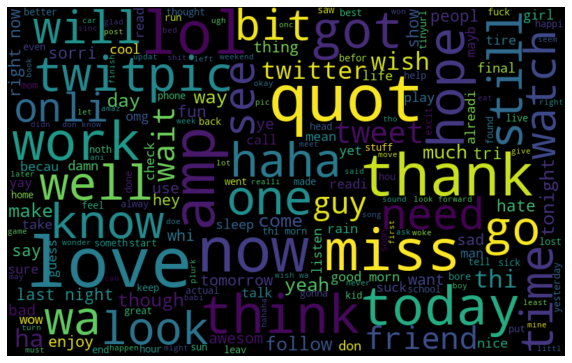

In [106]:
words = ' '.join([text for text in dataset['clean_text']])
wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 100).generate(words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

#### 4.2.1 Wordcloud pozytywnych tweetów

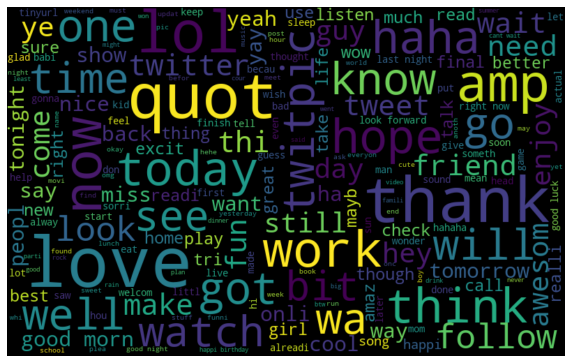

In [107]:
positive_words = ' '.join([text for text in positive_dataset['clean_text']])
wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 100).generate(positive_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

#### 4.2.1 Wordcloud negatywnych tweetów

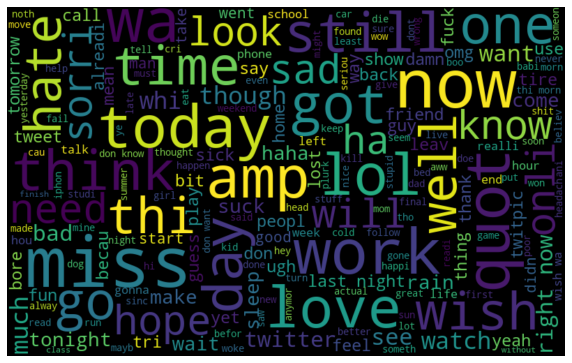

In [108]:
negative_words = ' '.join([text for text in negative_dataset['clean_text']])
wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 100).generate(negative_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

## 5. Klasyfikacja

### 5.1 BagOfWords & Regresja logistyczna

In [144]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import f1_score

# połączenie zbioru treningowego i testowego (append), aby stworzyć wspólny BoW
dataset_append = train_set.append(test_set)

# BoW Vectorizer na połączonym zbiorze danych
bow_vectorizer = CountVectorizer(max_df = 0.9, min_df = 2, max_features = 1000, stop_words='english')
bow = bow_vectorizer.fit_transform(dataset_append['clean_text'])

# rodzielenie BoW na testowy i treningowy
train_bow = bow[:1280000,:]
test_bow = bow[1280000:,:]

# model regresji logistycznej i dopasowanie do danych treningowych
lreg = LogisticRegression()
lreg.fit(train_bow,train_set['target'])

#predykcja
prediction = lreg.predict_proba(test_bow)

#ewaluacja
prediction_int = prediction[:,1] >= 0.5
prediction_int = prediction_int.astype(np.int)
bow_lr_f1 = f1_score(test_set['target'],prediction_int)

print(f"F1 score dla regresji logistycznej przy Bag Of Word {bow_lr_f1}")

F1 score dla regresji logistycznej przy Bag Of Word 0.7599985632957994


In [151]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TD-IDF Vectorizer na połączonym zbiorze danych
tfidf_vectiorizer = TfidfVectorizer(max_df=0.9, min_df = 2,max_features = 1000, stop_words = 'english')
tfidf = tfidf_vectiorizer.fit_transform(dataset_append['clean_text'])

# rozdzielenie TD-IDF na testowy i treningowy
train_ftdif = tfidf[:1280000,:]
test_tfdif = tfdif[1280000:,:]

# dopasowanie do danych treningowych
lreg.fit(train_ftdif,train_set['target'])

# predyckja
prediction = lreg.predict_proba(test_tfdif)

# ewaluacja
prediction_int = prediction[:,1] >= 0.5
prediction_int = prediction_int.astype(np.int)
tfidif_lr_f1 = f1_score(test_set['target'],prediction_int)

print(f"F1 score dla regresji logistycznej przy TD-IDF {tfidif_lr_f1}")

F1 score dla regresji logistycznej przy TD-IDF 0.7572561043898335
